In [1]:
import pandas as pd
import numpy as np
import mibian
import random

In [2]:
c = mibian.Me([422, 420, 0.01, 7, 911], volatility=21.63)

In [46]:
mu = 0.0010
sigma = 0.012
start_price = 420

returns = np.random.normal(loc=mu, scale=sigma, size=911)
price = start_price*(1+returns).cumprod()

In [47]:
forward = [mibian.Me([price[-d], 420, 0.01, 7, d], volatility=21.63).callPrice for d in range(911,0,-1)]

In [48]:
days = [d for d in range(0,911,1)]

In [49]:
returns = pd.DataFrame({"Underlying Price": price, "LEAP Price": forward, "Days": days})

In [50]:
import plotly.express as px

fig = px.line(returns,x="Days", y=["Underlying Price","LEAP Price"])
fig.show()

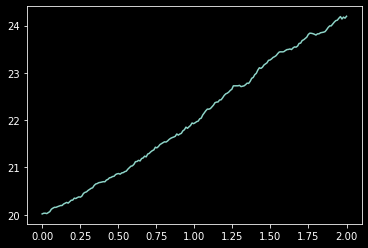

In [40]:
import matplotlib.pyplot as plt
import numpy as np

T = 2
mu = 0.1
sigma = 0.01
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()